# REGRESIÓN EXPONENCIAL
## Usando el modelo de desarrollo

###  Formulación del Problema 
 * Se espera predecir el número de personas  contagiadas y recuperadas del COVID19 hasta una fecha determinada futura.
 * Experimentaremos con varias fechas y comprando con las cifras reales con las predecidas en nuestro modelo.
 * Se dispone de 7 o más días para poder verificar la precisión del modelo.
 * Las variables de interes para este modelo son las siguientes:
   * Número de personas contagiadas.
   * Días desde que empezó la pandemia.
   * Número de personas recuparadas.
 * Se espera estudiar como aumenta el número de contagiados con el avance de cada día y de igual manera el aumento de las personas recuperadas.
 * Este modelo persentará números reales de personas sin porcentajes.
 * La interfaz será de complejidad media ya que será de uso técnico.

### Definición del sistema
* El sistema modelado,  en base al número de personas contagiadas desde el día 1 hasta la fecha que se realiza este modelo y predecirá a cuantos llegarán en una fecha en el futuro no lejano. Mencionando la frontera entre el modelo y su medio ambiente es en los datos reales de los contagios y los datos que el sistema modelado producirá.

### Formulación del modelo
* Los aspectos relevantes del sistema real son en primer lugar las personas contagiadas de COVID-19, siguiendole los días que han transcurrido desde el inicio de la pandemia.

### Colección de datos


In [12]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as mp
%matplotlib inline

In [6]:
url = 'covid_19_clean_complete.csv'
df = pd.read_csv(url)
df


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [7]:
df = df[df['Country/Region'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df.loc[:,['Date','Confirmed', 'Recovered']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
FMT = '%Y-%m-%d'
date = df['Date']
df['Date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

df

,Date,Confirmed,Recovered
95,21,0,0
356,22,0,0
617,23,0,0
878,24,0,0
1139,25,0,0
...,...,...,...
47858,204,78148,33455
48119,205,79049,34544
48380,206,80036,34544
48641,207,80694,34896


<AxesSubplot:xlabel='Date'>

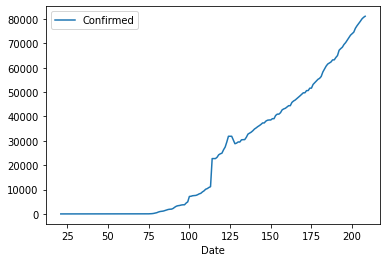

In [8]:
df.plot(x ='Date', y='Confirmed')

### Implementación 

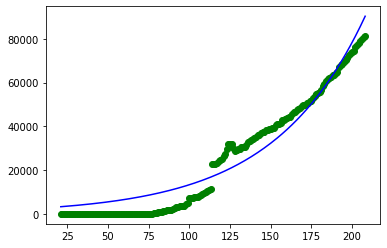

El número de infectados el 10 de noviembre del 2020 será:  600882.6018586119
El número de infectados el 1 de diciembre del 2020 será:  871666.929080177


In [18]:
x1 = np.array(x, dtype=float) #transformo mi array de datos a floats 
y1 = np.array(y, dtype=float)

def mod_exponencial(x, a, b): #funcion que permite realizar la regrecion con el modelo exponencial
    return a * np.exp(b * x) 

popt, pcov = curve_fit(mod_exponencial, x1, y1, p0=(0,0.1))

#Grfica del modelo exponencial

plt.plot(x1, y1, 'go',label="Original Data")
plt.plot(x1, mod_exponencial(x1,*popt),color='blue')
plt.show()


pro_x = mod_exponencial(315,*popt)
print("El número de infectados el 10 de noviembre del 2020 será: ", pro_x)

pro_x = mod_exponencial(336,*popt)
print("El número de infectados el 1 de diciembre del 2020 será: ", pro_x)


## Modelo Polinomial 
### Se realizará los mismos pasos para este modelo


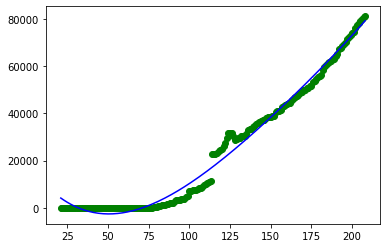

El número de infectados el 10 de noviembre del 2020 será:  209665.84832814086
El número de infectados el 1 de diciembre del 2020 será:  256303.71384527627


In [20]:

x2 = np.array(x, dtype=float)
y2 = np.array(y, dtype=float) 

def func_polinomial(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

popt1, pcov1 = curve_fit(func_polinomial, x2, y2)
#print ("a = %s , b = %s, c = %s, d = %s, e = %s" % (popt1[0], popt1[1], popt1[2], popt1[3], popt1[4]))

plt.plot(x2, y2, 'go',label="Datos Originales")
plt.plot(x2, func_polinomial(x2, *popt1), color = 'blue')
plt.show()



pro_x1 = func_polinomial(315,*popt1)
print("El número de infectados el 10 de noviembre del 2020 será: ", pro_x1)

pro_x1 = func_polinomial(336,*popt1)
print("El número de infectados el 1 de diciembre del 2020 será: ", pro_x1)

### Interpretación  y Análisis 
#### Al revisar los datos de ambos modelos se puede tomar en cuanta con los datos reales en las fechas planteadas. Se entiende que el modelo Poliniomial es el mas acertado entre estos dos. ya que para las fechas del noviembre hay un total de 180 mil infectados en el país y el modelo polinomial nos da un total de 209 mil, y el modelo exponencial aoenas nos da 60 mil


##  Criterio personal
### Político 
* En nuestro país ha sido duramente afectado por la pandemia y uno de los factores que a colaborado con esta situación ha sido la corrupción de magnitudes inimaginables, políticos totalmente indolientes con la población en general y más específicamente con las personas que necesitaron en su debido momento medicamentos, atención, etc. 
* Debido a esto producir aplicaciones que ayuden a un control y predicción de los casos, es al menos un ayuda para la población quizá no una que ayude como de verdad se quisiera pero  al menos a tenernos informados ya que hasta la información nos ha sido ocultada y privada por que no decirlo.

### Económico
* De por si el Ecuador no gozaba de un buena economía antes de que la pandemia llegara al país, entonces fue obvio que nos iba a golpear fuertemente la situación. Y como un golpe de gracia la corrupción practicamente nos dejó con una situación tan crítica que pequeños y grandes emprendimientos cerraron aunque talbipen unos surgieron, todo fue como cada individuo o familia se adaptó a esta pandemia.
* Y lo peor aún está por venir así que se necesita un plan de emergencia para al menos poder resistir a una crisis económica de gran evergadura.

### Social
* Muchas personas pensaron que esta pandemia la situación en general, cambiaría nuestra forma de pesnar, vivir y convivir, pero nada más alejado de la realidad. Todos quieren volver a una normalidad de la que desde antes mismo se quejaban y parece que no hay ningun cambio positivo en la sociedad en general. 
* Personas acaparando insumos en centros comerciales sin pensar en el resto que también necesita de ellos, ese escenario se vió por todo el planeta. La contaminación con plásticos fue en aumento. Entonces nos quiere decir que no hay forma en que nuestro pensamiento o prepectiva vaya a cambiar para bien.
* Aunque al menos hubo un pequeño punto que si fue positivo, al menos para nuestro planeta que después de varias semanas de cuarentena se vió un cambio genial en ver lugares totalmente limpios y menos contaminados